# Import required libraries

In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

# unpack the dataset

In [3]:
#load the dataset mnist into variable ojects which is composed of images of resolution 28 * 28 of handwritten digits
objects =  tf.keras.datasets.mnist 
# unpack and load the dataset
(training_images, training_labels), (test_images, test_labels) = objects.load_data()


The number of images used for training and testing

In [12]:
len(training_images )

60000

In [13]:
len(test_images)

10000

# Sample images used in training the model

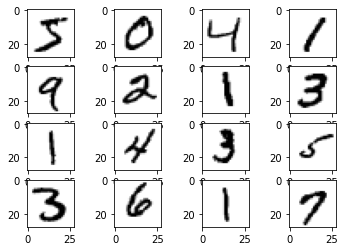

In [11]:
for i in range(16):
    plt.subplot(4,4, i + 1 )
    plt.imshow(training_images[i], cmap = plt.cm.binary)


In [7]:
print(training_images.shape)
print(training_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

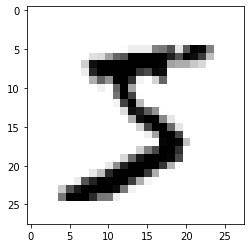

In [4]:
plt.imshow(training_images[0], cmap = plt.cm.binary)
plt.show()

# Normalization to reduce stress on computation

In [5]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [6]:
print(training_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

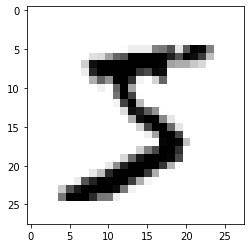

In [42]:
plt.imshow(training_images[0], cmap = plt.cm.binary)
plt.show()

# Define architecture of the model

In [7]:
# Here the architecure of the model is defined

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
# most go to optimizer is adam, others include stochastic gradient descent
# we gonna calcluate losses using sparse categorica _crossentropy if it were two classes maybe binary categorical crossentropy
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Training

In [11]:
# model.fit(training_images, training_labels, epochs=5)
history = model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2172 - accuracy: 0.9464
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2067 - accuracy: 0.9492
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1954 - accuracy: 0.9515
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1842 - accuracy: 0.9545
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1825 - accuracy: 0.9554
Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1793 - accuracy: 0.9570
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1726 - accuracy: 0.9579
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1706 - accuracy: 0.9587
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1714 - accuracy: 0.9599
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1638 - accurac

In [14]:
history.history

{'loss': [0.17928990721702576,
  0.17255324125289917,
  0.17064924538135529,
  0.17140129208564758,
  0.16376596689224243],
 'accuracy': [0.9569666385650635,
  0.9579333066940308,
  0.9587000012397766,
  0.959933340549469,
  0.9605666399002075]}

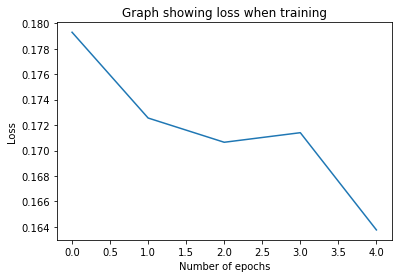

In [20]:
plt.plot(history.history['loss'] )
plt.title('Graph showing loss when training')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()

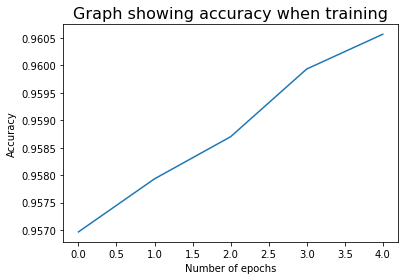

In [21]:
plt.plot(history.history['accuracy'] )
plt.title('Graph showing accuracy when training', fontdict={'fontsize':16})
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

# Model evaluation

In [12]:

print(model.evaluate(test_images,test_labels))

313/313 [==============================] - 0s 1ms/step - loss: 0.2726 - accuracy: 0.9497: 0s - loss: 0.3154 - accuracy: 0.
[0.27257391810417175, 0.9496999979019165]


In [83]:
psix = model.predict(test_images[339].reshape(-1,28,28))
test_labels[339], psix.argmax(axis=1), psix.max(axis=1)

(6, array([6], dtype=int64), array([0.9994342], dtype=float32))

In [42]:
six_imgs, six_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 6:
        six_imgs.append(test_images[i])
        six_labels.append(test_labels[i])
        counter +=1
    if counter ==10:
        break;

len(six_imgs), len(six_labels)

(10, 10)

In [87]:
four_imgs, four_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 4:
        print(i)
        four_imgs.append(test_images[i])
        four_labels.append(test_labels[i])
        counter +=1
    if counter ==10:
        break;

len(four_imgs), len(four_labels)

4
6
19
24
27
33
42
48
49
56


(10, 10)

In [86]:
nine_imgs, nine_labels = [], []

counter = 0

for i in range(test_images.shape[0]):
    if test_labels[i] == 9:
        print(i)
        nine_imgs.append(test_images[i])
        nine_labels.append(test_labels[i])
        counter +=1
    if counter ==10:
        break;

len(nine_imgs), len(nine_labels)

7
9
12
16
20
58
62
73
78
92


(10, 10)

In [84]:
psix[0][8]
print(psix[0])

[1.09133156e-12 7.49911604e-21 1.33478244e-13 4.58305788e-18
 1.05911339e-16 4.54607187e-04 9.99434173e-01 0.00000000e+00
 1.10770634e-04 3.29757228e-07]


<BarContainer object of 10 artists>

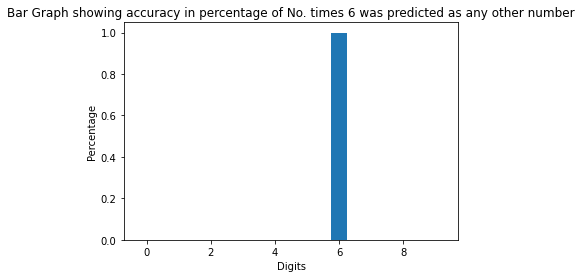

In [85]:
# help(plt.bar)
plt.title("Bar Graph showing accuracy in percentage of No. times 6 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(psix[0]))],psix[0], width=0.5) 

In [75]:
#predicting digit 9
pnine = model.predict(test_images[7].reshape(-1,28,28))
test_labels[7], pnine.argmax(axis=1), pnine.max(axis=1)

(9, array([9], dtype=int64), array([0.9841308], dtype=float32))

<BarContainer object of 10 artists>

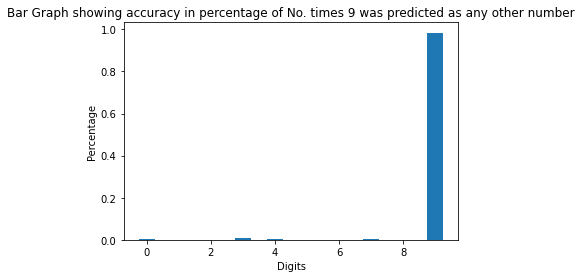

In [76]:
plt.title("Bar Graph showing accuracy in percentage of No. times 9 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(pnine[0]))],pnine[0], width=0.5) 

In [81]:
pfour = model.predict(test_images[4].reshape(-1,28,28))
test_labels[4], pfour.argmax(axis=1), pfour.max(axis=1)

(4, array([4], dtype=int64), array([1.], dtype=float32))

<BarContainer object of 10 artists>

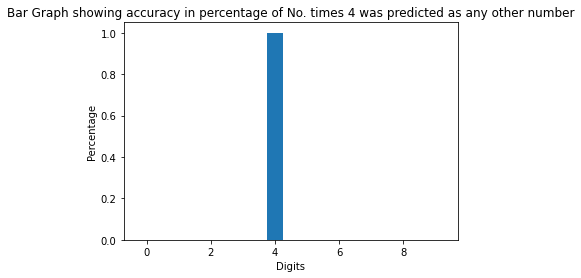

In [82]:
plt.title("Bar Graph showing accuracy in percentage of No. times 4 was predicted as any other number")
plt.ylabel('Percentage')
plt.xlabel('Digits')

plt.bar([i for i in range(0, len(pfour[0]))],pfour[0], width=0.5) 

In [64]:
model.save('mnist_grp1.model')

INFO:tensorflow:Assets written to: mnist_grp1.model\assets


In [ ]:
saved_model = tf.keras.models.load_model('mnist_grp1.model')